# Introduction
   - This data set is about putting students into math, reading and writing test with different factors that may or may not affect their grades.
#### Factors may affect:-
        1 - Gender (M/F)
        2 - race/ethnicity
        3 - parental level of education
        4 - Lunch they have taken
        5 - Test prepration course
        
## 1- Data Cleaning
       1.1 Import data and view first 10 rows.
       1.2 Rename columns.
       1.3 Check for null values.
       1.4 Check for duplicates.
## 2- Exploratory the data set
       2.1 - Check the distrubution between males and females.
       2.2 - Let us see the distrubution of each test.
       2.3 - Relationship between having a preperation test and not.
       2.4 - Let us see the impact of the parental degree.
       2.5 - Difference between male and females.
       2.6 - Does the ethnicity have also an impact on the grades.
       2.7 - Effect of the lunch on how students do in the exam.
## 3- Conclusion

## 1- Data Importing and Cleaning
### 1.1 Import data set

In [54]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
df=pd.read_csv('./StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1.2 Rename columns
- Rename column race/ethnicity to ethnicity.
- replace all spaces into (under scores).

In [56]:
df.rename(columns={'race/ethnicity': 'ethnicity','parental level of education':'parent_education','test preparation course':'prep_course','math score':'math_score','reading score':'reading_score','writing score':'writing_score'},inplace=True)

In [57]:
df.head()

,gender,ethnicity,parent_education,lunch,prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1.3 - Check for nulls
  - No null values

In [58]:
df.isna().sum()

gender              0
ethnicity           0
parent_education    0
lunch               0
prep_course         0
math_score          0
reading_score       0
writing_score       0
dtype: int64

### 1.4 Check for Duplicates
  - No duplicates

In [59]:
df.duplicated().sum()

0

In [60]:
df.shape

(1000, 8)

In [61]:
print(df.ethnicity.unique())
print(df.parent_education.unique())

['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


### What is the structure of your dataset?

There are 1000 student have taken a Math, Writing, and Reading exam in the dataset with 8 features (Gender, ethnicity, Parent Education, Lunch, and Prep. Course).

**Grades**
(0) ——> (100) <br>
**Gender**: Male or Female <br>
**Race/Ethnicity**: Group A, B, C, D,or E <br>
**Parent Education**: bachelor's degree, some college, master's degree, associate's degree, high school, or some high school.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting a better grades for my students. Which can make us see what is the best for our kids to be prepared for an exam regarding what it is.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that preparation will have the strongest effect on every student overall. Does the gender also, have a realtion between having an exam better than another. For ex: Math_test > Writing_test and vice versa etc... <br>
Last thing is taking lunch is better for students, so we make a reminder for our kids to eat well before their exam.



## 2 - Exploratory the data set
### 2.1 - Check the distrubution between males and females. 
 - The data set is normally distrubuted between genders according to the figure below.
 - **Female** = 518. (51.8%)
 - **Male** = 482. (48.2%)
 _______________________
 - **Total** = 1000.

In [62]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

Almost the half is separted into male and female making a better investigation for our Dataset.

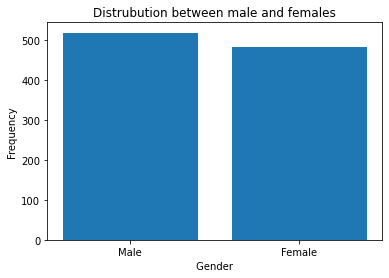

In [63]:
plt.bar(["Male","Female"],df.gender.value_counts())
plt.title('Distrubution between male and females')
plt.xlabel(' Gender ')
plt.ylabel('Frequency');

In [64]:
df.query('prep_course == "completed"').gender.value_counts()

female    184
male      174
Name: gender, dtype: int64

### 2.2 -  Let us see the distrubution of each test
 - As we can see in the figure below the math test is normally distrubuted.
 - On the other hand, the writing and reading score we can see more spike graph.
 - So, let us see if we can figure out any realtion between those exams.
 - Calirfy that the writing and the reading test specific feature affect them more.

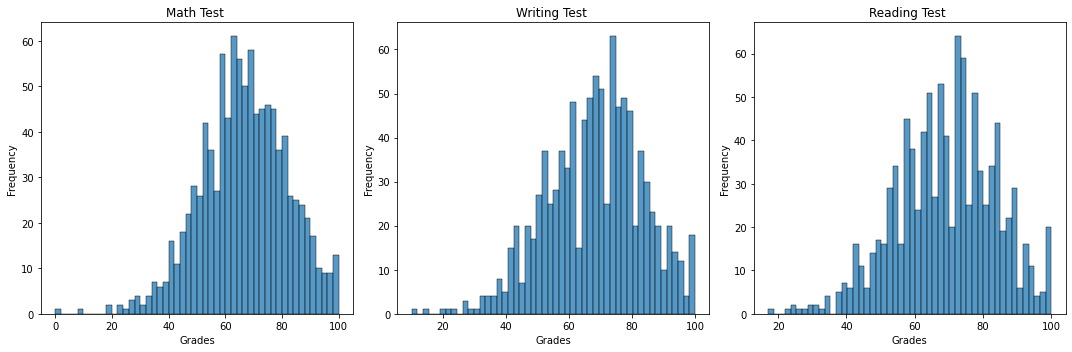

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# Math test
sb.histplot(df.math_score,ax=axes[0],bins=50);
axes[0].title.set_text('Math Test ')
axes[0].set_xlabel('Grades')
axes[0].set_ylabel('Frequency');
# Writing test
sb.histplot(df['writing_score'], ax=axes[1],bins=50);
axes[1].title.set_text('Writing Test ')
axes[1].set_xlabel('Grades')
axes[1].set_ylabel('Frequency');
# # Reading Test
sb.histplot(df['reading_score'], ax=axes[2],bins=50);
axes[2].title.set_text('Reading Test ')
axes[2].set_xlabel('Grades')
axes[2].set_ylabel('Frequency');
fig.tight_layout()

### 2.3 Relationship between having a prep test and not

 #### As we can see in the figures below the prep course made an impact on students by having a better grades:-
 - In **Writing** test the curve transformed from a median **50% to 70%** approximately.
 - In **Reading** test the curve transformed from a median **50% to 80%** approximately. **Biggest** impact
 - In **Writing** test the curve transformed from a median **45% to 70%** approximately.
 - So we can say that the prep course changed the overall grades.

In [66]:
#Math Test
had_test_m=df.query('prep_course == "completed"')['math_score'].value_counts()
had_no_test_m=df.query('prep_course == "none"')['math_score'].value_counts()
#Writing Test
had_test_w=df.query('prep_course == "completed"')['writing_score'].value_counts()
had_no_test_w=df.query('prep_course == "none"')['writing_score'].value_counts()
#Reading Test
had_test_r=df.query('prep_course == "completed"')['reading_score'].value_counts()
had_no_test_r=df.query('prep_course == "none"')['reading_score'].value_counts()
print('Math Test with prep_test median = ',had_test_m.median()*10,'  Math Test without prep_test median = ',had_no_test_m.median()*10)
print('Writing Test with prep_test median = ',had_test_w.median()*10,'  Writing Test without prep_test median = ',had_no_test_w.median()*10)
print('Reading Test with prep_test median = ',had_test_r.median()*10,'  Reading Test without prep_test median = ',had_no_test_r.median()*10)

Math Test with prep_test median =  45.0   Math Test without prep_test median =  70.0
Writing Test with prep_test median =  50.0   Writing Test without prep_test median =  70.0
Reading Test with prep_test median =  50.0   Reading Test without prep_test median =  80.0


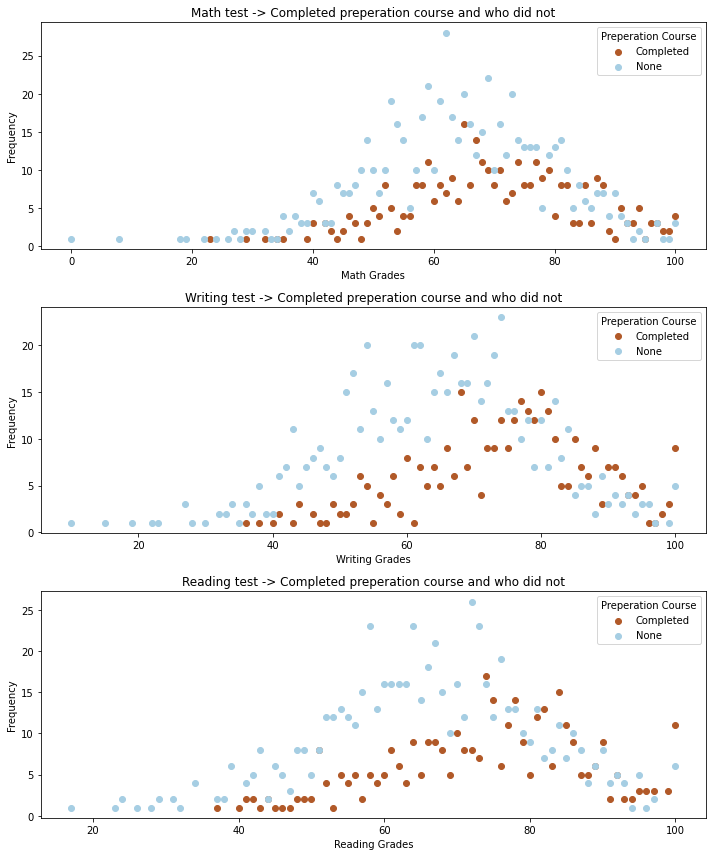

In [67]:
fig, ax = plt.subplots(nrows=3,ncols=1, figsize = [10,12])
#Brown
color1=(0.69411766529083252, 0.3490196168422699, 0.15686275064945221, 1.0)
#Light Blue
color2=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0)

#Math Test
ax[0].scatter(x=had_test_m.index, y=had_test_m,color=color1,label='Completed')
#Didn't complete Preparation Course
ax[0].scatter(x=had_no_test_m.index, y=had_no_test_m,color=color2,label='None')
ax[0].title.set_text('Math test -> Completed preperation course and who did not')
ax[0].set_xlabel('Math Grades')
ax[0].set_ylabel('Frequency')
ax[0].legend(title='Preperation Course')

#Writing Test
ax[1].scatter(x=had_test_w.index, y=had_test_w,color=color1,label='Completed')
#Didn't complete Preparation Course
ax[1].scatter(x=had_no_test_w.index, y=had_no_test_w,color=color2,label='None')
ax[1].title.set_text('Writing test -> Completed preperation course and who did not')
ax[1].set_xlabel('Writing Grades')
ax[1].set_ylabel('Frequency')
ax[1].legend(title='Preperation Course')

#Reading Test
ax[2].scatter(x=had_test_r.index, y=had_test_r,color=color1,label='Completed')
#Didn't complete Preparation Course
ax[2].scatter(x=had_no_test_r.index, y=had_no_test_r,color=color2,label='None')
ax[2].title.set_text('Reading test -> Completed preperation course and who did not')
ax[2].set_xlabel('Reading Grades')
ax[2].set_ylabel('Frequency')
ax[2].legend(title='Preperation Course')

fig.tight_layout()

### 2.4 Let us see the impact of the parental degree
 #### In the figure below we can see how parents education differ in their child grades:-
 - We ordered in the figure below according the highest reading score to the lowest.
 - As we can see the grades are directly proportional to level of education, but the grades doesn't impact the students grades as we expected.
 - **Master -> bachelor -> assosicate -> some college -> some high school -> high school**

In [68]:
df.parent_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

#### We took the median of each reading score and sorted it descending, so it can be from the highest degree to lowest according to their grade.

<ipython-input-69-5e72ccd78a56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ans=df.groupby(['parent_education'])['reading_score','writing_score','math_score'].median().sort_values(by=['reading_score'],ascending=False)


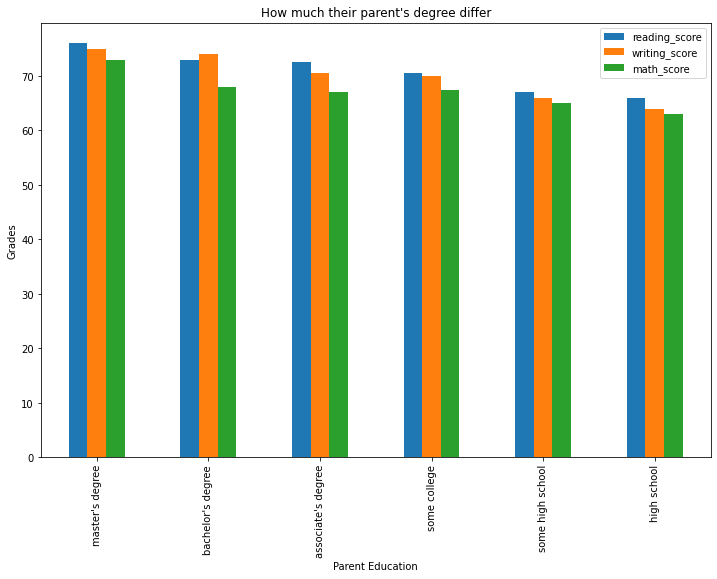

In [69]:
ans=df.groupby(['parent_education'])['reading_score','writing_score','math_score'].median().sort_values(by=['reading_score'],ascending=False)
ans.plot(kind='bar',xlabel='Parent Education',ylabel='Grades',title='How much their parent\'s degree differ',figsize=(12,8));

### 2.5 - Difference between male and females
#### The gender In the figure below each test the gender made an impact on it:-
 - In the **Math test** Male's are better than Female's.
 - On the other hand, Female's are better in **Reading** and **Writing Test**

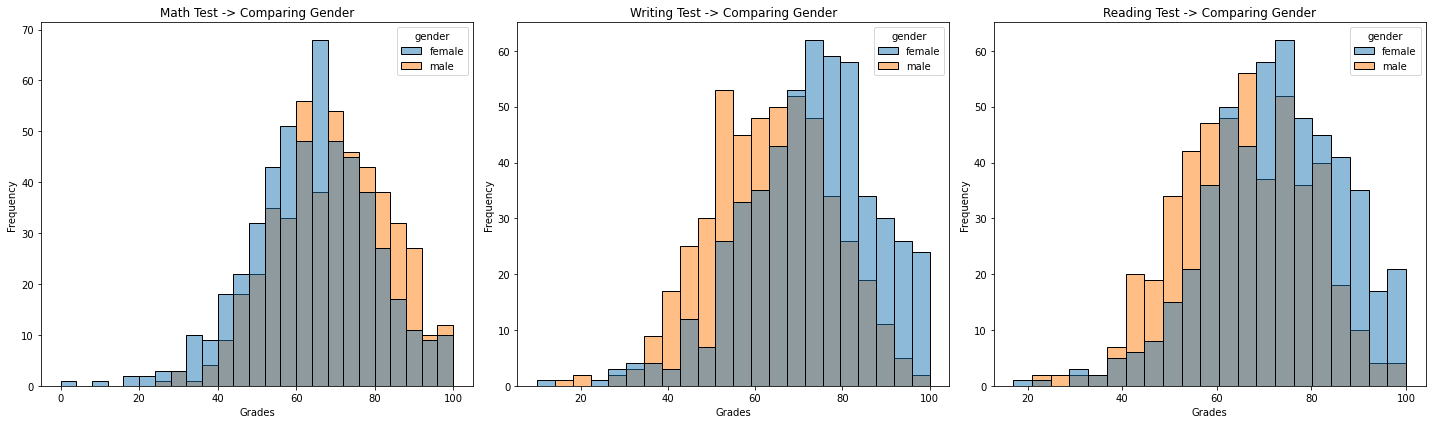

In [70]:
fig, ax = plt.subplots(nrows=1,ncols=3, figsize = [20,6])

#Brown
color1=(0.69411766529083252, 0.3490196168422699, 0.15686275064945221, 1.0)
#Light Blue
color2=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0)

#Math
sb.histplot(data = df, x = 'math_score', hue = 'gender',ax=ax[0])
ax[0].set_title('Math Test -> Comparing Gender')
ax[0].set_xlabel('Grades')
ax[0].set_ylabel('Frequency')

#Writing
sb.histplot(data = df, x = 'writing_score', hue = 'gender',ax=ax[1])
ax[1].set_title('Writing Test -> Comparing Gender')
ax[1].set_xlabel('Grades')
ax[1].set_ylabel('Frequency')

#Reading
sb.histplot(data = df, x = 'reading_score', hue = 'gender',ax=ax[2])
ax[2].set_title('Reading Test -> Comparing Gender')
ax[2].set_xlabel('Grades')
ax[2].set_ylabel('Frequency')

fig.tight_layout()

### 2.6 Does the ethnicity have also an impact on the grades

 - Group A has the lowest grade every time.

In [71]:
great_75=df.query('math_score > 75 or writing_score > 75 or reading_score > 75')

In [72]:
great_75.ethnicity.value_counts()

group C    133
group D    123
group E     83
group B     70
group A     23
Name: ethnicity, dtype: int64

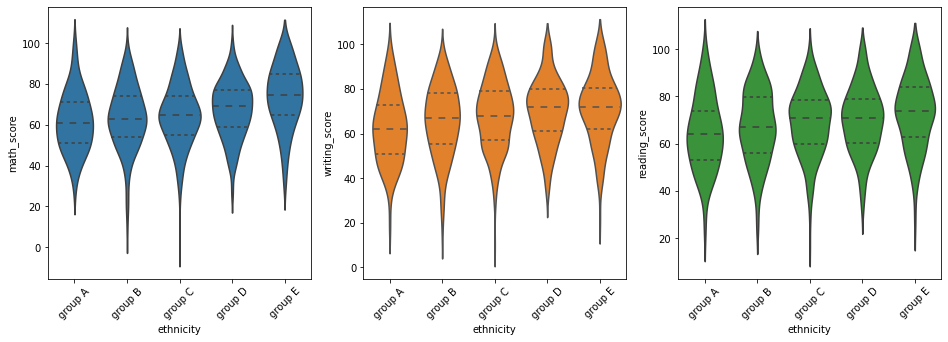

In [126]:
# Types of sedan cars
type_groups = ['group A', 'group B', 'group C', 'group D', 'group E']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vgroupes = pd.api.types.CategoricalDtype(ordered=True, categories=type_groups)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df.ethnicity = df.ethnicity.astype(vgroupes);
base_color = sb.color_palette()[0]
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='ethnicity', y='math_score',inner='quartile',color = base_color);
plt.xticks(rotation=45);

plt.subplot(1, 3, 2)
base_color = sb.color_palette()[1]
sb.violinplot(data=df, x='ethnicity', y='writing_score', inner='quartile', color = base_color);
plt.xticks(rotation=45);

plt.subplot(1, 3, 3)
base_color = sb.color_palette()[2]
sb.violinplot(data=df, x='ethnicity', y='reading_score', inner='quartile', color = base_color);
plt.xticks(rotation=45);

### 2.7 - Effect of the lunch on how students do in the exam
 - As we compared the total people who had lunch standard and free/reduced.
 - The compare is biased to standard because of the difference in the total students between the two.
 - **Standard = 645** and **Free/reduced = 355**.
 - Which is the half the people.So, we can say from the median between the two, the lunch students had better overall grades ,than the students who have taken the Free/reduced lunch.
 - **Standard (Median) = 95%** and **Free/reduced(Median) = 45%**.

In [74]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [125]:
had_lunch=df.query('lunch == "standard"')['math_score'].value_counts()
had_no_lunch=df.query('lunch == "free/reduced"')['math_score'].value_counts()
print(had_lunch.median(),had_no_lunch.median())

8.5 4.0


Approximately there is 10% difference between who had **Standard** and **Free/Reduced** lunch regarding his ethnicity.

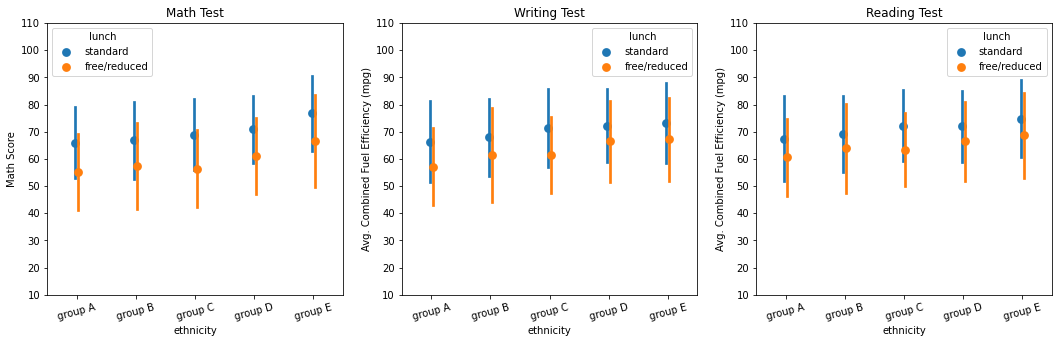

In [123]:
# Display Combined fuel economy by Vehicle Class and transmission type

plt.figure(figsize=(18, 5))
#Ethnicity
plt.subplot(1,3,1)
sb.pointplot(data=df, x='ethnicity', y='math_score', hue='lunch', ci='sd', linestyles="", dodge=True) 
plt.title('Math Test')
plt.xticks(rotation=15);
plt.yticks(np.arange(10, 120, step=10))
plt.ylabel('Math Score')

plt.subplot(1,3,2)
sb.pointplot(data=df, x='ethnicity', y='writing_score', hue='lunch', ci='sd',linestyles="",dodge=True)
plt.title('Writing Test')
plt.xticks(rotation=15);
plt.yticks(np.arange(10, 120, step=10))
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

plt.subplot(1,3,3)
sb.pointplot(data=df, x='ethnicity', y='reading_score', hue='lunch', ci='sd',linestyles="",dodge=True)
plt.title('Reading Test')
plt.xticks(rotation=15);
plt.yticks(np.arange(10, 120, step=10))
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')


fig.tight_layout()


## Conclusion
 - Men and women are evenly distrubuted to have a fair comparison.
 - First, for the gender factor male students are better in math, but female are better in writing and reading.
 - Second, the preperation test had better results with students and an overall average.
 - Third, the ethnicity of our students differs in grades which need to know what are the circumstaces that they meet and try to imorve it for them.
 - Fourth, having a standard lunch affect on the performance of our students which need to put in consideration also.
 - Finally, we figured out that parental degree doesn't affect much on our students.